---
title: "MLOps Card for OncoDerm AI"
execute:
  eval: true
  echo: false
jupyter: python3
---


In [1]:
from IPython.display import Image

---

**Date**: `2024-11-29`  
**Author**: `Sai Madhavan G`  
**Version**: `v1.0`  

---

### **Overview**

This MLOps card serves as a comprehensive record of the tools, methodologies, and decision-making processes employed during the development and deployment of the OncoDerm AI project. The document aims to ensure transparency, reproducibility, and maintainability across the project's lifecycle.


## Workflow Management with Kedro

### Overview

We used **Kedro** to organize our workflow into modular, reusable components called **nodes** and **pipelines**. Kedro allows seamless integration of data engineering and machine learning tasks by clearly separating data, code, and configuration.

### Features of Kedro

- **Modular Workflow**: Nodes encapsulate individual tasks, which are then assembled into pipelines.
- **Data Catalog**: Facilitates streamlined handling of datasets.
- **Reproducibility**: Enhances collaboration and ensures reproducibility of experiments.
- **Configuration Management**: Centralized configuration for pipelines and datasets.
- **Visualization**: Interactive pipeline visualization using Kedro-Viz.

### Implementation

- **Pipeline Design**: Divided the classification task into stages—data preprocessing, model training, evaluation, and deployment.
- **Reusability**: Nodes for data preprocessing can be reused across different datasets.
- **Flexibility**: Easy to modify pipelines for different experiments without disrupting the overall workflow.

### Challenges

- Since all the pipelines are defined to be DAGs, we couldn't realize use cases where we needed a circular dependency between nodes.
- The learning curve for Kedro was steep initially, but the documentation and community support were helpful.
- Converting kedro pipelines to inference pipelines for deployment was not straightforward.

### Version and Installation

- **Version Used**: `Kedro 0.19.9`
- **Installation Command**:
  ```bash
  pip install kedro==0.19.9
  ```

### Resources

- [Kedro Documentation](https://docs.kedro.org/en/0.19.9/)

---


## Testing Strategy

### Overview

We adopted **pytest** as our primary testing framework, which integrates well with Kedro. The goal was to ensure that individual **nodes** and **pipelines** function as expected, enhancing the reliability of the workflow.

### Implementation

- **Unit Tests**: Unit tests were written for most nodes to validate their individual functionality. For example:
  - Testing data transformations in preprocessing nodes.
  - Verifying model predictions in evaluation nodes.
- **Test Coverage**: While many of nodes have been tested, some remain to be covered. These tests are planned to ensure full confidence in the pipeline's robustness.
- **Continuous Integration (CI)**: Integrated testing into CI pipelines to catch errors early in the development cycle using pre-commit hooks.

### Pytest Integration with Kedro

Kedro's structure makes it easier to write modular tests:

- Testing isolated nodes by mocking inputs and outputs.

### Challenges

- Some edge cases for untested nodes are still under review.

### Version and Installation

- **Version Used**: `pytest 8.3.3`
- **Installation Command**:
  ```bash
  pip install pytest==8.3.3
  ```

### Resources

- [Pytest Documentation](https://docs.pytest.org/en/stable/)
- [Kedro Testing Guide](https://docs.kedro.org/en/stable/development/automated_testing.html)

---


## Automated Documentation Generation

### Overview

To maintain up-to-date and user-friendly documentation for the project, we utilized **Quartodoc** and **Quarto**. These tools helped automate the generation of clear and structured documentation for both developers and stakeholders.

### Implementation

1. **Quartodoc**:

   - Used to extract docstrings from our codebase and generate API documentation.
   - Ensured consistency and minimized the manual effort of documenting changes in the code.
   - Simplified navigation through the project's functions, classes, and modules.

2. **Quarto**:
   - Served as the publishing tool for creating documentation in a variety of formats (e.g., HTML, PDF).
   - Enabled the integration of Quartodoc-generated API docs with explanatory text, diagrams, and project details.

### Features

- **Dynamic API Updates**: Whenever the codebase changes, documentation is regenerated to reflect the updates.
- **Markdown Integration**: Allowed seamless embedding of markdown for customization.

### Workflow

- **Documentation Generation**: The pipeline was integrated with the development process to trigger automatic documentation generation during builds using pre-commit hooks.
- **Integration with CI/CD**: Documentation can be auto-deployed to a hosted platform for easy access.

### Example Command

To generate documentation:

```bash
quartodoc build
quarto render
```

### Challenges

- **Custom Configurations**: Initial setup required additional effort to configure Quartodoc for the project's structure.
- **Consistency**: Ensuring all code had properly formatted docstrings to maximize automation benefits.
- **Resources**: Quartodoc didn't have a lot of community resources for troubleshooting.
- **Parser Not Working**: Some issues were faced with the parser not recognizing certain docstrings.

### Version and Installation

- **Version Used**: `Quartodoc 0.9.1`, `Quarto 1.2.57`
- **Installation Command**:
  ```bash
  pip install quartodoc==0.9.1
  ```
- [Quarto installation guide](https://quarto.org/docs/get-started/)

### Resources

- [Quartodoc Documentation](https://machow.github.io/quartodoc/get-started/overview.html)
- [Quarto Documentation](https://quarto.org/docs/guide/)

---


## Code Linting with Ruff

### Overview

To ensure code quality, maintain consistent styling, and catch potential bugs early, we integrated **Ruff** as the primary linting tool. Ruff is a fast and flexible Python linter designed to handle large projects efficiently.

### Key Benefits

- **Performance**: Processes codebases significantly faster than traditional linters.
- **Broad Rule Support**: Implements rules from popular linting tools like Flake8, pylint, and pyupgrade.
- **Customizability**: Allows fine-grained configuration for the project's specific requirements.

### Implementation

1. **Setup**:
   - A configuration file (`pyproject.toml`) was created to define project-specific rules and ignore patterns.
2. **Pre-Commit Hook**:
   - Integrated Ruff into the CI pipeline to enforce linting rules on every pull request.
3. **Codebase-wide Audit**:
   - Performed an initial pass with Ruff to identify and fix legacy code issues.

### Example Commands

To lint the codebase:

```bash
ruff check .
```

To fix linting issues automatically:

```bash
ruff check --fix .
```

### Challenges

- **Configuration Complexity**: Understanding and fine-tuning the rules to match the project's style guide.
- **False Positives**: Some rules flagged issues that were acceptable in the project context.

### Version and Installation

- **Version Used**: `Ruff 0.7.2`
- **Installation Command**:
  ```bash
  pip install ruff==0.7.2
  ```

### Resources

- [Ruff Documentation](https://docs.astral.sh/ruff/)
- [Kedro Linting Guide](https://docs.kedro.org/en/0.19.6/development/linting.html)

---


## Data Preprocessing Pipeline

### Overview

The data preprocessing pipeline is a crucial step in preparing the dataset for training. In this project, the pipeline addresses several challenges like class imbalance, data augmentation, normalization, and conversion into tensors. The key steps in the pipeline are:

1. **Handling Class Imbalance** using SMOTE (Synthetic Minority Over-sampling Technique).
2. **Data Augmentation** using random transformations like rotation, flipping, and color jitter.
3. **Normalization** of image pixel values.
4. **Resizing and Tensor Conversion** for consistency in input size and format.

### Key Functions

1. **Class Imbalance with SMOTE**:
   - The function `class_imbalance` uses the SMOTE technique to oversample the minority class in the dataset, which helps improve model performance when training on imbalanced data.
   - **Package Used**: `imblearn` (SMOTE)
2. **Data Augmentation**:

   - Augmentations such as horizontal and vertical flips, rotations, and color jitter are applied using the `torchvision.transforms` module.
   - **Package Used**: `torchvision`
   - The `data_aug` function generates new samples for the dataset by applying these transformations multiple times to each image.

3. **Normalization**:
   - The pixel values of the images are normalized to the range [0, 1] using the `normalizing_images` function.
4. **Resizing and Tensor Conversion**:
   - Images are resized to a fixed size (28x28) and converted to tensors using `tensoring_resizing` to ensure that they are in the correct format for model input.

### Data Flow

1. **Input Data**: The raw training and validation data (e.g., `train_raw`, `val_raw`) are passed through the pipeline.
2. **Nodes**:
   - **Class Imbalance**: SMOTE is applied to the training data to address class imbalance.
   - **Data Augmentation**: Random augmentations are applied to the training data to increase its diversity.
   - **Normalization and Resizing**: The images are normalized and resized to ensure they are in the correct format.
3. **Outputs**:
   - The final outputs are pre-processed training (`pre-processed_train_data`) and validation (`pre-processed_val_data`) datasets, which are ready for model training.

### How to Run

```bash
kedro run --pipeline data_preprocessing
```

### Challenges and Considerations

- **Class Imbalance**: SMOTE is a powerful technique for balancing the dataset, but it may create synthetic samples that do not perfectly represent real-world data. This can sometimes affect the model's generalization ability.
- **Augmentation**: While data augmentation improves model robustness, it may also introduce noise. Care must be taken to select meaningful augmentations that mimic real-world variations.
- **Normalization**: Proper normalization is essential for neural networks, especially when using pre-trained models, as it ensures consistency in input data.

### Version and Installation

- **SMOTE (imblearn)**:

  - Version: `0.12.4`
  - Installation:
    ```bash
    pip install imbalanced-learn==0.12.4
    ```

- **Torchvision**:

  - Version: `0.20.1`
  - Installation:
    ```bash
    pip install torchvision==0.20.1
    ```

- **PIL (Pillow)**:
  - Version: `11.0.0`
  - Installation:
    ```bash
    pip install Pillow==11.0.0
    ```


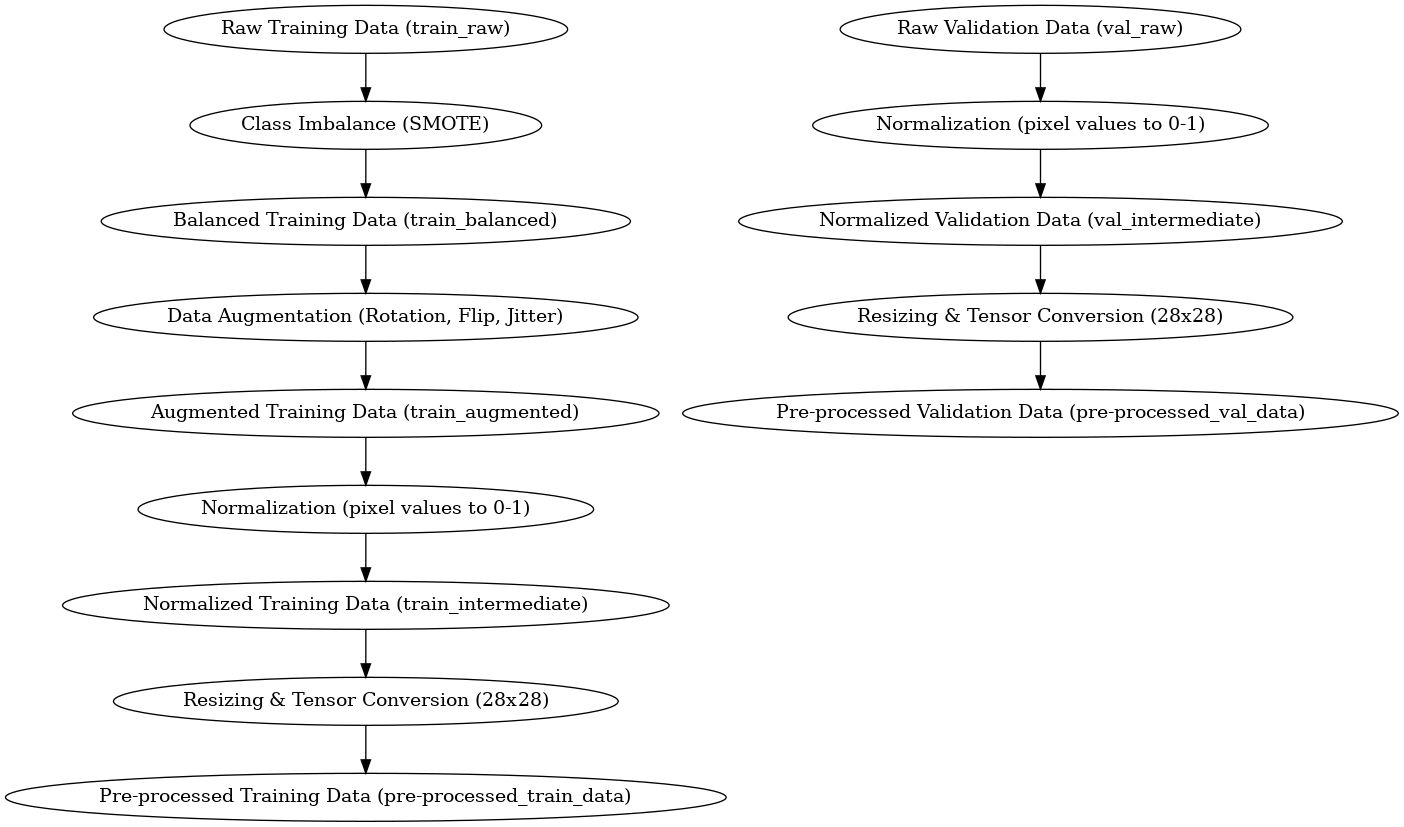

In [ ]:
from graphviz import Digraph

# Create a directed graph for the data preprocessing pipeline
dot = Digraph(comment="Data Preprocessing Pipeline")

# Add nodes for each stage
dot.node("A", "Raw Training Data (train_raw)")
dot.node("B", "Class Imbalance (SMOTE)")
dot.node("C", "Balanced Training Data (train_balanced)")
dot.node("D", "Data Augmentation (Rotation, Flip, Jitter)")
dot.node("E", "Augmented Training Data (train_augmented)")
dot.node("F", "Normalization (pixel values to 0-1)")
dot.node("G", "Normalized Training Data (train_intermediate)")
dot.node("H", "Resizing & Tensor Conversion (28x28)")
dot.node("I", "Pre-processed Training Data (pre-processed_train_data)")
dot.node("J", "Raw Validation Data (val_raw)")
dot.node("K", "Normalization (pixel values to 0-1)")
dot.node("L", "Normalized Validation Data (val_intermediate)")
dot.node("M", "Resizing & Tensor Conversion (28x28)")
dot.node("N", "Pre-processed Validation Data (pre-processed_val_data)")

# Add edges between the nodes
dot.edge("A", "B")
dot.edge("B", "C")
dot.edge("C", "D")
dot.edge("D", "E")
dot.edge("E", "F")
dot.edge("F", "G")
dot.edge("G", "H")
dot.edge("H", "I")
dot.edge("J", "K")
dot.edge("K", "L")
dot.edge("L", "M")
dot.edge("M", "N")

# Save the graph to a file and render as an image
output_path = "./images/data_preprocessing_pipeline"
dot.render(output_path, format="png", cleanup=True)


Image(filename=output_path + ".png")

## Model Training Pipeline

The **Model Training Pipeline** is responsible for preparing data, training a deep learning model, evaluating its performance, and logging the results for version control and reproducibility.

### Overview

This pipeline is built using **Kedro 0.19.8** and leverages **PyTorch**, **MLFlow**, and other utilities for efficient training and tracking. It includes the following stages:

1. **Data Preprocessing**: Transforms raw input data into a suitable format for training.
2. **Model Fine-tuning**: Uses a pre-trained model (e.g., ResNet18) and fine-tunes it on the dataset.
3. **Evaluation**: Computes key metrics such as accuracy, F1-score, precision, and recall on validation/test datasets.
4. **Logging**: Records model metrics, hyperparameters, and artifacts into **MLFlow** for tracking and comparison.
5. **Best Model Selection**: Identifies the best model version based on performance metrics (e.g., F1-score).

---

### Key Components

#### 1. **Preprocessing**

- Resizes images to \(224 \times 224\).
- Applies normalization with mean \([0.485, 0.456, 0.406]\) and standard deviation \([0.229, 0.224, 0.225]\).
- Converts image data to **PyTorch Tensors** for model compatibility.

#### 2. **Model Fine-tuning**

- Supports ResNet18 with an updated fully connected layer for 7 output classes.
- Optimizer: **Adam**.
- Loss Function: **CrossEntropyLoss**.
- Tracks training and validation performance after each epoch using **macro F1-score**.

#### 3. **Evaluation**

- Uses **classification_report** from Scikit-learn to compute detailed performance metrics.
- Outputs a dictionary summarizing accuracy, precision, recall, and F1-score.

#### 4. **Logging**

- Logs model artifacts and metrics to **MLFlow**:
  - Model weights and architecture.
  - Training/validation F1-score trends.
  - Loss curves.
- Enables reproducibility with experiment tracking.

#### 5. **Best Model Selection**

- Automatically identifies and selects the best-performing model version using MLFlow’s client API.

---

### Pipeline Nodes

1. **Preprocess Data Input**

   - Input: `pre-processed_train_data`, `pre-processed_val_data`.
   - Output: `train_dataset`, `val_dataset`.

2. **Model Fine-tuning**

   - Input: Preprocessed datasets, model name, training parameters, device.
   - Output: Fine-tuned model weights, training loss plot.

3. **Evaluate Model**

   - Input: Model name, weights, test dataset, batch size, device.
   - Output: Performance metrics dictionary.

4. **Log Model**

   - Input: Model name, weights, hyperparameters, metrics, training loss plot.
   - Output: MLFlow URI.

5. **Set Best Model URI**
   - Input: Model name, MLFlow URI.
   - Output: Best model URI, loaded model.

---

### Tools and Libraries

| Library     | Purpose                                  | Version |
| ----------- | ---------------------------------------- | ------- |
| **PyTorch** | Deep learning framework                  | 2.5.1   |
| **MLFlow**  | Experiment tracking and artifact logging | 2.17.2  |

---

### Installation

Install all required packages using the following command:

```bash
pip install torch matplotlib scikit-learn mlflow
```

### Outputs

- **Fine-tuned Model**: State dictionary (model_finetuned).
- **Performance Metrics**: Accuracy, precision, recall, F1-score (model_metrics).
- **Visualization**: Loss plots showing training and validation F1-scores.
- **Logged URI**: MLFlow model artifact URI (mlflow_uri).


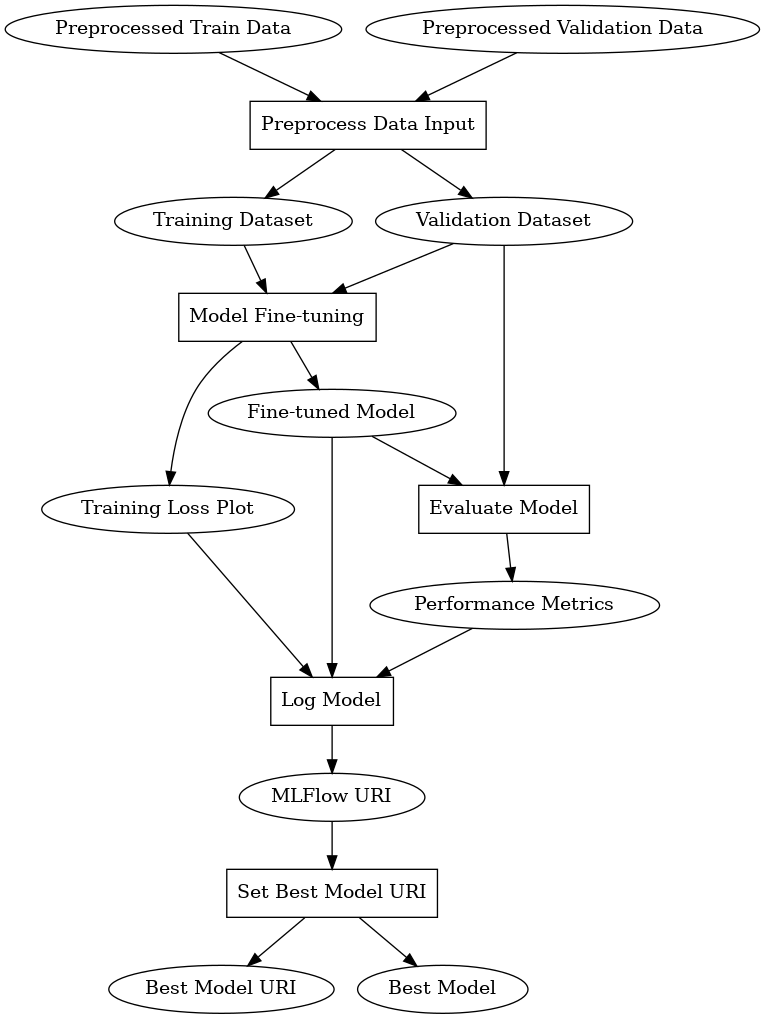

In [ ]:
from graphviz import Digraph

# Define the pipeline diagram
diagram = Digraph("Model_Training_Pipeline", format="png")

# Nodes for each stage
diagram.node("A", "Preprocess Data Input", shape="box")
diagram.node("B", "Model Fine-tuning", shape="box")
diagram.node("C", "Evaluate Model", shape="box")
diagram.node("D", "Log Model", shape="box")
diagram.node("E", "Set Best Model URI", shape="box")

# Inputs and outputs
diagram.node("F", "Preprocessed Train Data", shape="ellipse")
diagram.node("G", "Preprocessed Validation Data", shape="ellipse")
diagram.node("H", "Training Dataset", shape="ellipse")
diagram.node("I", "Validation Dataset", shape="ellipse")
diagram.node("J", "Fine-tuned Model", shape="ellipse")
diagram.node("K", "Training Loss Plot", shape="ellipse")
diagram.node("L", "Performance Metrics", shape="ellipse")
diagram.node("M", "MLFlow URI", shape="ellipse")
diagram.node("N", "Best Model URI", shape="ellipse")
diagram.node("O", "Best Model", shape="ellipse")

# Edges to connect nodes
diagram.edges(
    [
        ("F", "A"),  # Preprocessed Train Data -> Preprocess Data Input
        ("G", "A"),  # Preprocessed Validation Data -> Preprocess Data Input
        ("A", "H"),  # Preprocess Data Input -> Training Dataset
        ("A", "I"),  # Preprocess Data Input -> Validation Dataset
        ("H", "B"),  # Training Dataset -> Model Fine-tuning
        ("I", "B"),  # Validation Dataset -> Model Fine-tuning
        ("B", "J"),  # Model Fine-tuning -> Fine-tuned Model
        ("B", "K"),  # Model Fine-tuning -> Training Loss Plot
        ("J", "C"),  # Fine-tuned Model -> Evaluate Model
        ("I", "C"),  # Validation Dataset -> Evaluate Model
        ("C", "L"),  # Evaluate Model -> Performance Metrics
        ("J", "D"),  # Fine-tuned Model -> Log Model
        ("L", "D"),  # Performance Metrics -> Log Model
        ("K", "D"),  # Training Loss Plot -> Log Model
        ("D", "M"),  # Log Model -> MLFlow URI
        ("M", "E"),  # MLFlow URI -> Set Best Model URI
        ("E", "N"),  # Set Best Model URI -> Best Model URI
        ("E", "O"),  # Set Best Model URI -> Best Model
    ]
)

# Render the diagram to an image file and display it
diagram.render("./images/Model_Training_Pipeline_Diagram", format="png", cleanup=True)
# Display the image in the notebook

Image(filename="./images/Model_Training_Pipeline_Diagram.png")

## OOD Detection Pipeline

### Overview

The Out-of-Distribution (OOD) detection pipeline is essential for ensuring that a trained model can accurately classify data, even when it comes from different distributions than the training data. This pipeline incorporates various OOD detection methods, which help the model identify when incoming data differs significantly from the distribution on which it was trained. The main steps in the pipeline include:

1. **Data Preparation**: Loading both in-distribution and out-of-distribution datasets.
2. **Model Training**: Training a WideResNet model on the in-distribution data.
3. **OOD Detection** using multiple techniques, including:
   - Multi-Mahalanobis Distance (Multi-Mahalanobis)
   - Maximum Softmax Probability (MSP)
   - Relative Mahalanobis Distance (RMD)

### Key Functions

1. **Data Preparation**:

   - The `prepare_data` function loads the in-distribution dataset (e.g., Dermamnist) and the out-of-distribution dataset (e.g., CIFAR-10) for testing the OOD detection methods.
   - **Package Used**: `medmnist`, `torchvision`
   - The function splits the datasets into training, validation, and test sets, preparing them for model training and evaluation.

2. **Model Training (WideResNet)**:

   - The function `train_wide_resnet` trains a WideResNet model on the in-distribution dataset using standard image classification techniques.
   - **Package Used**: `torch`, `torchvision`
   - This function ensures the model is well-optimized before applying the OOD detection methods.

3. **Multi-Mahalanobis Detector**:
   - The `multi_mahalanobis_detector` function uses the Multi-Mahalanobis distance method to detect OOD data. It calculates the Mahalanobis distance at multiple layers of the WideResNet model.
   - **Package Used**: `pytorch-ood`
   - This method identifies OOD samples by measuring the distance from each sample to the distribution of the in-distribution data.

### Data Flow

1. **Input Data**: The raw in-distribution and out-of-distribution datasets (e.g., Dermamnist and CIFAR-10) are loaded.
2. **Nodes**:
   - **Data Preparation**: The `prepare_data` function loads and splits the datasets into training and testing sets.
   - **Model Training**: The WideResNet model is trained using the `train_wide_resnet` function.
   - **OOD Detection**: The `multi_mahalanobis_detector` function evaluates the model’s ability to detect out-of-distribution samples.
3. **Outputs**:
   - The final outputs include the model (`wide_resnet_model`) and the OOD detection metrics (`ood_detection_metrics`), which indicate how well the model distinguishes between in-distribution and out-of-distribution data.

### How to Run

```bash
kedro run --pipeline ood_detection
```

### Challenges and Considerations

- **Dataset Choice**: The choice of in-distribution (Dermamnist) and out-of-distribution (CIFAR-10) datasets is crucial. If the datasets differ significantly from the real-world data, the OOD detection methods might not generalize well.

### Version and Installation

- **Pytorch-OOD**:
  - Version: `0.2.0`
  - Installation:
    ```bash
     pip install pytorch-ood==0.2.0
    ```


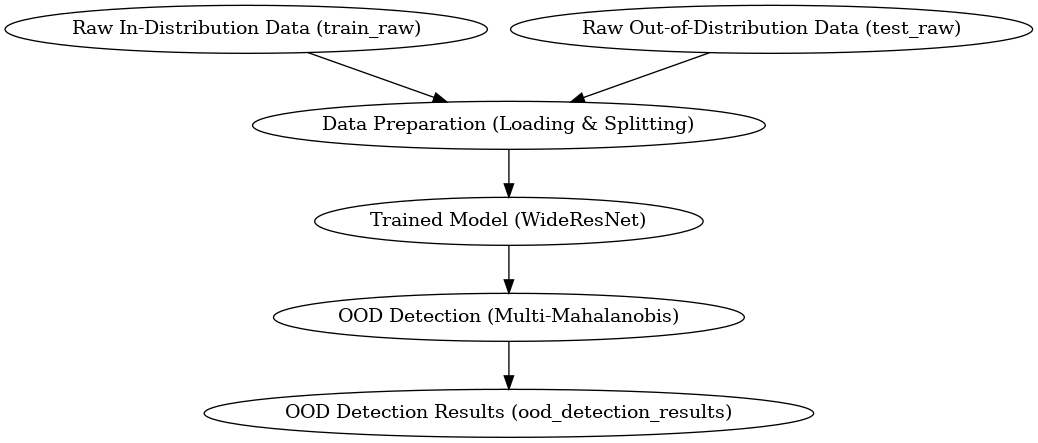

In [5]:
from graphviz import Digraph
from IPython.display import Image

# Create a directed graph for the OOD detection pipeline
dot = Digraph(comment="OOD Detection Pipeline")

# Add nodes for each stage
dot.node("A", "Raw In-Distribution Data (train_raw)")
dot.node("B", "Raw Out-of-Distribution Data (test_raw)")
dot.node("C", "Data Preparation (Loading & Splitting)")
dot.node("D", "Trained Model (WideResNet)")
dot.node("E", "OOD Detection (Multi-Mahalanobis)")
dot.node("F", "OOD Detection Results (ood_detection_results)")

# Add edges between the nodes
dot.edge("A", "C")
dot.edge("B", "C")
dot.edge("C", "D")
dot.edge("D", "E")
dot.edge("E", "F")

# Save the graph to a file and render as an image
output_path = "./images/ood_detection_pipeline"
dot.render(output_path, format="png", cleanup=True)

Image(filename=output_path + ".png")

## Conformal Prediction Pipeline

### Overview

The **Conformal Prediction (CP)** pipeline is used to generate predictive uncertainty estimates by constructing prediction regions for model outputs. In this project, the pipeline leverages a **SplitPredictor** and a **RAPS score** function for model calibration and evaluation. The key steps in the pipeline include:

1. **Data Preparation**: Preprocessing the calibration and test sets by resizing and normalizing the data.
2. **Model Calibration**: Calibrating the predictor model using a SplitPredictor, which adjusts predictions based on the provided calibration set.
3. **Model Evaluation**: Evaluating the calibrated model on the test set to assess the performance and the reliability of the predictions.

### Key Functions

1. **Data Preparation**:
   - The `data_prep` function prepares the calibration and test datasets by applying necessary transformations like resizing, tensor conversion, and normalization using `Compose`, `Resize`, `Normalize`, and `ToTensor` from `torchvision`.
   - **Package Used**: `medmnist`, `torchvision`
2. **Model Calibration**:
   - The `calibrate_predictor` function takes in the calibration dataset, loads the best model from `MLflow`, and calibrates the SplitPredictor using the RAPS score function with specified significance and penalty parameters.
   - **Package Used**: `mlflow`, `torchcp`
3. **Model Evaluation**:
   - The `evaluate_predictor` function evaluates the calibrated SplitPredictor on the test dataset and returns a set of metrics (e.g., accuracy, confidence).
   - **Package Used**: `torchcp`

### Data Flow

1. **Input Data**:
   - Raw calibration (`calibration_set`) and test (`test_set`) data are loaded and preprocessed using the `data_prep` function.
2. **Nodes**:
   - **Data Preparation**: The data is resized and normalized to a consistent format.
   - **Model Calibration**: The SplitPredictor is trained and calibrated with the provided calibration set.
   - **Model Evaluation**: The final model is evaluated on the test set to generate metrics.
3. **Outputs**:
   - The calibrated model (`cp_predictor`) and the evaluation metrics (`cp_metrics`) are generated as outputs of the pipeline.

### How to Run

```bash
kedro run --pipeline conformal_prediction
```

### Challenges and Considerations

- **Calibration**: The calibration process requires careful selection of the calibration set. A poor calibration set can lead to misleading prediction intervals.
- **Significance Level (α)**: The chosen value for α determines the confidence of the predictions, but too high of an α might make the model less confident, while too low could result in overly narrow intervals.
- **Penalization**: The penalty parameter affects the RAPS score function. Too high a penalty might lead to overly conservative predictions, whereas too low could lead to less reliable predictions.

### Version and Installation

- **TorchCP**:
  - Version: `0.1.3`
  - Installation:
    ```bash
    pip install torchcp==0.1.3
    ```


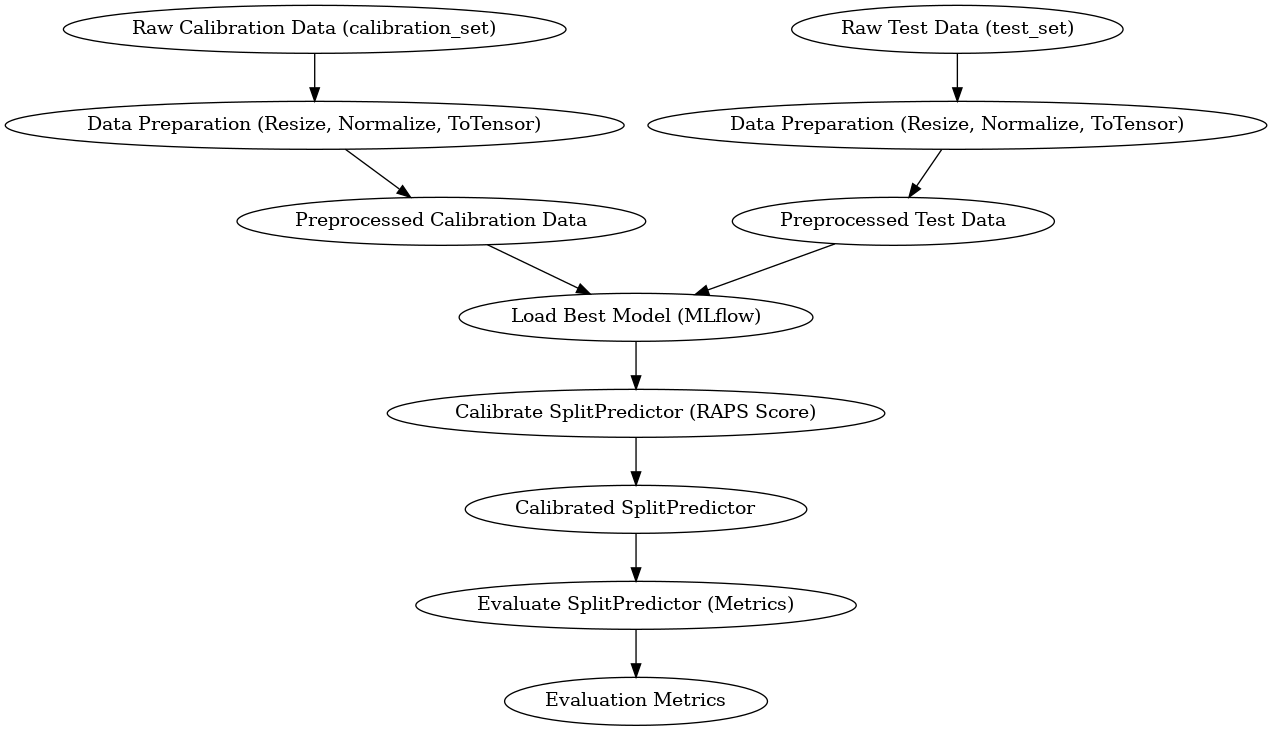

In [6]:
from graphviz import Digraph

# Create a directed graph for the Conformal Prediction pipeline
dot = Digraph(comment="Conformal Prediction Pipeline")

# Add nodes for each stage
dot.node("A", "Raw Calibration Data (calibration_set)")
dot.node("B", "Data Preparation (Resize, Normalize, ToTensor)")
dot.node("C", "Preprocessed Calibration Data")
dot.node("D", "Raw Test Data (test_set)")
dot.node("E", "Data Preparation (Resize, Normalize, ToTensor)")
dot.node("F", "Preprocessed Test Data")
dot.node("G", "Load Best Model (MLflow)")
dot.node("H", "Calibrate SplitPredictor (RAPS Score)")
dot.node("I", "Calibrated SplitPredictor")
dot.node("J", "Evaluate SplitPredictor (Metrics)")
dot.node("K", "Evaluation Metrics")

# Add edges between the nodes
dot.edge("A", "B")
dot.edge("B", "C")
dot.edge("D", "E")
dot.edge("E", "F")
dot.edge("C", "G")
dot.edge("F", "G")
dot.edge("G", "H")
dot.edge("H", "I")
dot.edge("I", "J")
dot.edge("J", "K")

# Save the graph to a file and render as an image
output_path = "./images/conformal_prediction_pipeline"
dot.render(output_path, format="png", cleanup=True)

Image(filename=output_path + ".png")

## Inference Data Preprocessing Pipeline

### Overview

The inference data preprocessing pipeline prepares images for inference and out-of-distribution (OOD) detection. This involves several steps to resize, normalize, and detect whether an image falls outside the model's distribution. The key steps in the pipeline include:

1. **Image Resizing**: Resizes the image to a standard size.
2. **Image Normalization**: Normalizes the image using predefined mean and standard deviation values.
3. **Preparing Data for OOD Detection**: Transforms the image into a format suitable for OOD detection using the `WideResNet` model.
4. **OOD Detection**: Uses the `MultiMahalanobis` detector to compute an OOD score and raises an exception if the score exceeds a threshold.

### Key Functions

1. **Resize Image**:

   - The `resize_image` function resizes an image to the desired size and converts it into a tensor format.
   - **Input**: Image, target size.
   - **Output**: Resized image tensor.

2. **Normalize Image**:

   - The `normalize_image` function normalizes an image using a given mean and standard deviation.
   - **Input**: Image tensor, mean and standard deviation.
   - **Output**: Normalized image tensor.

3. **Prepare Data for OOD Detection**:

   - The `prepare_data_for_ood` function transforms the image for OOD detection based on the pre-defined `WideResNet` transformation for `cifar10-pt`.
   - **Input**: Image.
   - **Output**: Transformed image ready for OOD detection.

4. **OOD Detection**:
   - The `ood_detection` function uses the `MultiMahalanobis` detector to compute an OOD score. If the score exceeds the threshold, an `OutOfDistributionError` is raised.
   - **Input**: Image tensor, OOD detector, threshold.
   - **Output**: OOD score or error if the threshold is exceeded.

### Data Flow

1. **Input Data**:
   - Raw image data passed for preprocessing (`inference_sample`).
2. **Nodes**:

   - **Resize Image**: Resizes the image.
   - **Normalize Image**: Normalizes the resized image.
   - **Prepare Data for OOD Detection**: Prepares the image for OOD detection.
   - **OOD Detection**: Detects if the image is OOD based on the computed score.

3. **Outputs**:
   - The primary output is the normalized and resized image tensor
   - The pipeline doesn't produce output directly after OOD detection, but an exception is raised if an image is detected as OOD.

### Hyperparameters:

- **OOD Threshold**: 0.07 (threshold above which an image is flagged as OOD)


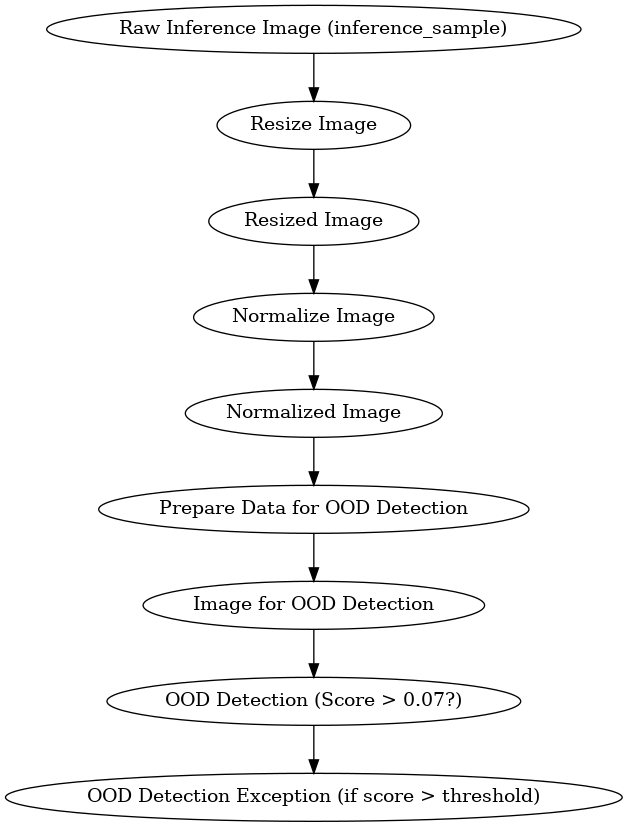

In [7]:
from graphviz import Digraph

# Create a directed graph for the Inference Data Preprocessing pipeline
dot = Digraph(comment="Inference Data Preprocessing Pipeline")

# Add nodes for each stage
dot.node("A", "Raw Inference Image (inference_sample)")
dot.node("B", "Resize Image")
dot.node("C", "Resized Image")
dot.node("D", "Normalize Image")
dot.node("E", "Normalized Image")
dot.node("F", "Prepare Data for OOD Detection")
dot.node("G", "Image for OOD Detection")
dot.node("H", "OOD Detection (Score > 0.07?)")
dot.node("I", "OOD Detection Exception (if score > threshold)")

# Add edges between the nodes
dot.edge("A", "B")
dot.edge("B", "C")
dot.edge("C", "D")
dot.edge("D", "E")
dot.edge("E", "F")
dot.edge("F", "G")
dot.edge("G", "H")
dot.edge("H", "I")

# Save the graph to a file and render as an image
output_path = "./images/inference_data_preprocessing_pipeline"
dot.render(output_path, format="png", cleanup=True)

Image(filename=output_path + ".png")

## Model Inference Pipeline

### Overview

The model inference pipeline handles the process of predicting the output for an input image using the trained model. It involves passing the preprocessed image through the best available model and returning the model's output. The key steps include:

1. **Model Prediction**: Using the trained model to predict the output for the given input image.

### Key Functions

1. **Predict**:
   - The `predict` function takes an input image, sends it through the model, and returns the output tensor.
   - **Input**: Trained model, input image, and device.
   - **Output**: Prediction tensor, which is the model's output for the input image.

### Data Flow

1. **Input Data**:
   - The preprocessed image (normalized) is passed into the model for inference (`normalized_img`).
2. **Nodes**:

   - **Prediction**: The image is passed through the trained model to generate a prediction.

3. **Output**:
   - The model's output, which is stored in the `prediction` variable.


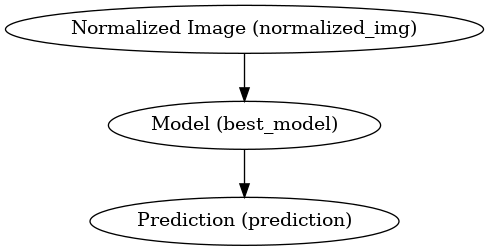

In [8]:
from graphviz import Digraph

# Create a directed graph for the Model Inference pipeline
dot = Digraph(comment="Model Inference Pipeline")

# Add nodes for each stage
dot.node("A", "Normalized Image (normalized_img)")
dot.node("B", "Model (best_model)")
dot.node("C", "Prediction (prediction)")

# Add edges between the nodes
dot.edge("A", "B")
dot.edge("B", "C")

# Save the graph to a file and render as an image
output_path = "./images/model_inference_pipeline"
dot.render(output_path, format="png", cleanup=True)

Image(filename=output_path + ".png")

## Inference Post-Processing Pipeline

### Overview
The inference post-processing pipeline is responsible for performing additional steps after the model prediction to improve the understanding and interpretability of the predictions. This includes generating conformal predictions, visualizing the model's decision-making using integrated gradients, and logging the prediction. The key steps include:

1. **Conformal Prediction**: Refines the model's predictions using a SplitPredictor to account for uncertainty.
2. **Integrated Gradients**: Visualizes the model's decision-making by attributing importance scores to input features.
3. **Logging Predictions**: Logs the predictions for future analysis and debugging.

### Key Functions

1. **Conformal Prediction**:
   - The `conformal_prediction` function refines the model's output using conformal prediction, providing a confidence interval for the prediction.
   - **Input**: Model output tensor and a SplitPredictor.
   - **Output**: List of refined predictions.

2. **Integrated Gradients**:
   - The `integrated_gradients` function computes the feature attribution for the input image using the integrated gradients method, which highlights which parts of the image are most important for the model's prediction.
   - **Input**: The model, processed image, raw image, and predictions.
   - **Output**: Visualizations of the integrated gradients for each prediction.

3. **Log Prediction**:
   - The `log_prediction` function logs the final prediction using the Python logging library, allowing for easy tracking of the predictions.
   - **Input**: The refined predictions.
   - **Output**: None (logs the prediction).

### Data Flow

1. **Input Data**: 
   - The `prediction` and `cp_predictor` are passed to the conformal prediction node.
   - The `best_model`, `normalized_img`, `resized_img`, and `conformal_prediction` are passed to the integrated gradients node.
   
2. **Nodes**:
   - **Conformal Prediction**: The model output is refined using the SplitPredictor.
   - **Integrated Gradients**: Visualizations are generated to show which parts of the image contributed to the prediction.
   - **Logging**: The final prediction is logged.

3. **Output**: 
   - The post-processed prediction (`conformal_prediction`), the integrated gradients visualizations, and the final logged prediction.

### Version and Installation

- **Captum** (for Integrated Gradients):
  - Version: `0.7.0`
  - Installation:
    ```bash
    pip install captum==0.7.0
    ```


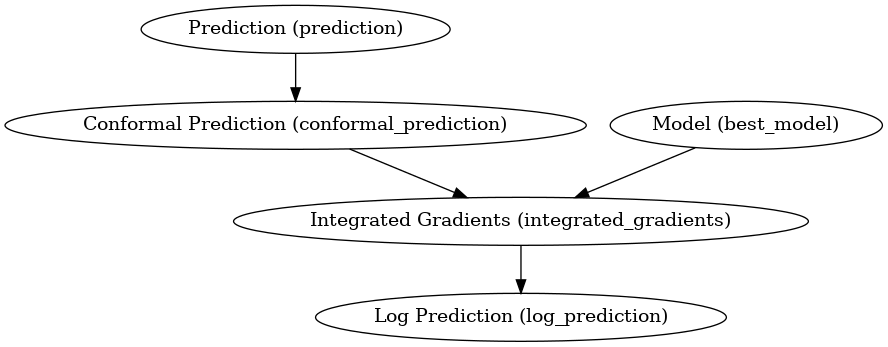

In [9]:
from graphviz import Digraph

# Create a directed graph for the Inference Post-Processing pipeline
dot = Digraph(comment="Inference Post-Processing Pipeline")

# Add nodes for each stage
dot.node("A", "Prediction (prediction)")
dot.node("B", "Conformal Prediction (conformal_prediction)")
dot.node("C", "Model (best_model)")
dot.node("D", "Integrated Gradients (integrated_gradients)")
dot.node("E", "Log Prediction (log_prediction)")

# Add edges between the nodes
dot.edge("A", "B")
dot.edge("B", "D")
dot.edge("C", "D")
dot.edge("D", "E")

# Save the graph to a file and render as an image
output_path = "./images/inf_postprocessing_pipeline"
dot.render(output_path, format="png", cleanup=True)

Image(filename=output_path + ".png")

## Inference API Deployment

To operationalize the skin cancer detection model, we developed and deployed a RESTful API using **FastAPI** and **Kedro**, ensuring scalability, modularity, and ease of use. The deployment includes a containerized backend that processes images, runs inference pipelines, and returns predictions along with model interpretability outputs.

### Overview

1. **Pipeline Orchestration**:
   - The **Kedro** pipelines for inference preprocessing, model execution, and postprocessing are integrated into a single unified pipeline (`inference`).
   - This modular approach ensures reusability and simplifies debugging. 
   - We use `kedro-boot` for converting this pipeline into a low latency API.

2. **API Design**:
   - The **FastAPI** application exposes a `/predict` endpoint that takes an image as input.
   - The image undergoes preprocessing (resizing, normalization, and out-of-distribution detection), model inference, and postprocessing (conformal prediction and visualization).

3. **Interpretability**:
   - The API generates visual explanations using integrated gradients, highlighting the regions of the image that influenced the model’s prediction.

4. **Error Handling**:
   - Comprehensive error management ensures the API responds gracefully to invalid inputs, out-of-distribution data, and unexpected failures.

5. **Containerization**:
   - The application is **Dockerized**, enabling consistent deployment across environments and easy scalability.
